- Thresholding is a technique used in digital image processing to separate objects of interest from the background based on their intensity levels.

- Thresholding is one of the segmentation techniques that generates a binary image (a binary image is one whose pixels have only two values – 0 and 1 and thus requires only one bit to store pixel intensity) from a given grayscale image by separating it into two regions based on a threshold value.

- Threshold segmentation mainly extracts foreground based on gray value information, so it is especially useful for segmentation of images with strong contrast between foreground objects and background.

- Thresholding assumes that the intensity range of the objects is different from the background, and it requires either light objects on a dark background or vice versa.

- The steps of thresholding involve selecting a threshold value (t), identifying object points where the intensity is greater than t, and creating a segmented image where values above t are set to 1 and values below or equal to t are set to 0.

- Thresholding can be applied globally (with a constant threshold throughout the image) or locally (with variable thresholds based on the properties of a neighborhood or adaptive thresholds based on spatial coordinates).

- Adaptive thresholding is useful for images with multiple dominant modes, where the image is divided into blocks, and global thresholding is applied to each block individually to obtain a segmented image with two dominant modes.

-  Noise in an image often degrades this widely-separated two-peak histogram distribution and leads to difficulties in adequate thresholding and segmenting. When noise is present, it is appropriate to use some filter to clean the image and then apply segmentation. The relative object sizes play a role in determining the accuracy of segmentation. 

- After Segmentation get a histogram of the areas  -> Set a treshold 

![Example Image](https://media.geeksforgeeks.org/wp-content/uploads/histogram-4.png)

#### The more widely the two peaks in the histogram are separated, the better thresholding and hence image segmenting algorithms will work. Noise in an image often degrades this widely-separated two-peak histogram distribution and leads to difficulties in adequate thresholding and segmenting. When noise is present, it is appropriate to use some filter to clean the image and then apply segmentation. The relative object sizes play a role in determining the accuracy of segmentation. 



Import the necessary libraries: PIL is imported from the PIL package for image handling, and matplotlib.pyplot is imported for image visualization.

Load the JPEG file using PIL: The image is loaded from the specified file path using Image.open(), and the resulting PIL image object is stored in image_pil.

In [38]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt

Load the JPEG file using PIL: The image is loaded from the specified file path using Image.open(), and the resulting PIL image object is stored in image_pil.

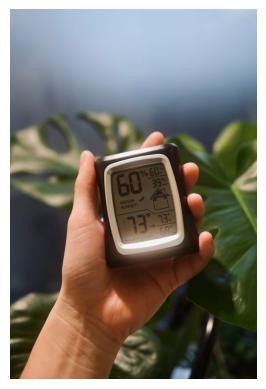

In [114]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the JPEG file using PIL
image_pil = Image.open('/Users/julianortner/Desktop/Tresholding/tresholding_tutorial.jpeg')

# Convert the PIL image to a NumPy array
#Convert the PIL image to a NumPy array: The image is converted from a PIL image object to a NumPy array using np.array(), and the resulting array is stored in image_np.

image_np = np.array(image_pil)

# Display the image
plt.imshow(image_pil)
plt.axis('off')  # Remove axes
plt.show()

Gaussian blur is a commonly used image smoothing technique that reduces noise and enhances the quality of subsequent image analysis. It works by convolving the image with a Gaussian kernel. In this example, a kernel size of (7, 7) is used, which specifies the width and height of the kernel. The last argument, 0, indicates that the standard deviation of the Gaussian kernel will be calculated automatically based on the kernel size.

The purpose of applying Gaussian blur after converting to grayscale is to improve the quality of the image for subsequent operations, such as edge detection or thresholding. It helps to reduce noise and create smoother transitions between different regions in the image, making subsequent analysis more robust and accurate.

The kernel size refers to the dimensions of the kernel matrix. It determines the extent of the neighborhood considered for the calculation of the new pixel value. A larger kernel size includes a wider range of neighboring pixels, resulting in more smoothing or blurring effect.

The size of the kernel determines the trade-off between the level of smoothing and the preservation of fine details. Larger kernel sizes tend to provide more blur or smoothing effect, while smaller kernel sizes preserve more details and produce less blur.

When applying operations like Gaussian blur, edge detection, or other filter-based operations, the choice of kernel size depends on factors such as the desired level of blurring, the size of structures or features you want to preserve, and the specific requirements of the task at hand.




In [55]:
# Convert the RGB image to grayscale: The RGB image is converted to grayscale using cv2.cvtColor(). The cv2.COLOR_RGB2GRAY flag is used to specify the conversion. The resulting grayscale image is stored in gray.
# a kernel (also known as a filter or mask) is a small matrix used for various operations like blurring, sharpening, edge detection, and more.

gray = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
'''. Gaussian blur is a commonly used image smoothing technique that reduces noise and enhances the quality of subsequent image analysis. 
It works by convolving the image with a Gaussian kernel. 
In this example, a kernel size of (7, 7) is used, which specifies the width and height of the kernel. 
The last argument, 0, indicates that the standard deviation of the Gaussian kernel will be calculated automatically
based on the kernel size.'''

array([[178, 178, 178, ..., 203, 203, 203],
       [178, 178, 178, ..., 203, 203, 203],
       [178, 178, 178, ..., 203, 203, 203],
       ...,
       [ 27,  27,  27, ...,  12,  12,  12],
       [ 27,  27,  27, ...,  12,  12,  12],
       [ 27,  27,  27, ...,  12,  12,  12]], dtype=uint8)

This line applies thresholding to the grayscale image gray using cv2.threshold(). Thresholding is a technique that converts an image into a binary image, where pixels are classified as either foreground or background based on a specified threshold value.

In this example, we set the threshold value to 45. Pixels with intensity values below 45 are assigned the value of 0 (background), and pixels with intensity values equal to or above 45 are assigned the value of 255 (foreground). The resulting binary image is stored in the variable thresholded. The _ is used to ignore the threshold value returned by cv2.threshold().

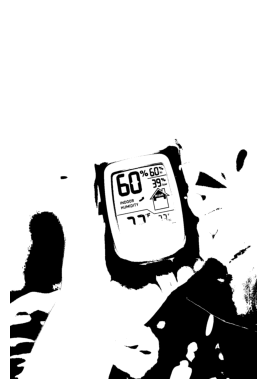

In [64]:
# Convert the RGB image to grayscale
gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

# Apply thresholding
_, thresholded = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresholded, cmap='gray')
plt.axis('off')  # Remove axes
plt.show()

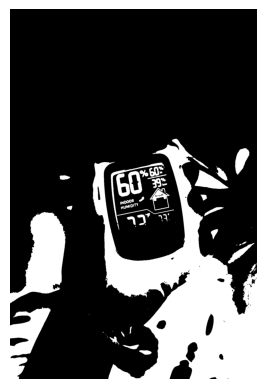

In [67]:
(T, threshInv) = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY_INV)

# Display the thresholded image
plt.imshow(threshInv, cmap='gray')
plt.axis('off')  # Remove axes
plt.show()

'''blurred: This is the input image that has undergone Gaussian blur, denoted by blurred in your code.
45: This value represents the threshold level. 
Pixels with intensity values below this threshold will be set to the maximum value (255), 
and pixels with intensity values equal to or above the threshold will be set to zero.
255: This value represents the maximum value that the thresholded pixels will be set to.
cv2.THRESH_BINARY_INV: This flag indicates that the thresholding operation should be an inverse binary thresholding. 
It means that pixels below the threshold will be set to the maximum value, while pixels above or equal to the threshold will be set to zero.'''

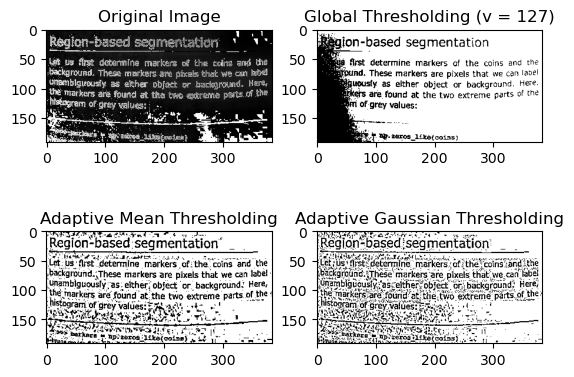

In [41]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
import cv2 as cv
import os 
import numpy as np
from matplotlib import pyplot as plt
img = data.page()
assert img is not None, "file could not be read, check with os.path.exists()"
bg= cv.GaussianBlur(img, (51,51), 24, 24)
img_fg = img-bg
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
 cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img_fg, th1, th2, th3]
for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
#plt.xticks([]),plt.yticks([])

plt.show()

# Tresholding -Tryout 

## Show original picture 

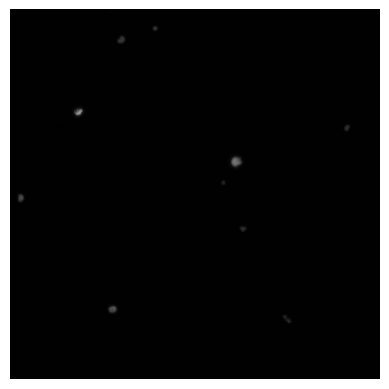

In [118]:
import cv2
import matplotlib.pyplot as plt
import skimage 


image = cv2.imread('/Users/julianortner/Desktop/Master MHS/8. Semester (Master MHS)/PSI FS23/Computational part/Images_TIFF/raw/23-1_DAPI_q6.tif')


# Display the  image
plt.imshow(image[1000:3000,1000:3000])
plt.axis('off')  # Remove axes
plt.show()


## Global tresholding 

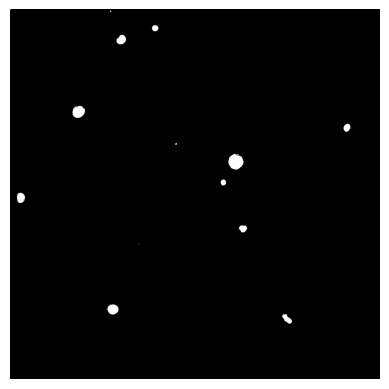

In [119]:
import cv2
import matplotlib.pyplot as plt
import skimage 
from skimage import morphology
# Load the TIFF image
image = cv2.imread('/Users/julianortner/Desktop/Master MHS/8. Semester (Master MHS)/PSI FS23/Computational part/Images_TIFF/raw/23-1_DAPI_q6.tif', cv2.IMREAD_GRAYSCALE)
# Apply thresholding
_, thresholded = cv2.threshold(image,5, 255, cv2.THRESH_BINARY)


# Display the thresholded image
plt.imshow(thresholded[1000:3000,1000:3000], cmap='gray')
plt.axis('off')  # Remove axes
plt.show()

# remove small-objects (skimage.morphology.remove_small_objects(ar, min_size=64, connectivity=1, *, out=None))
# remove small holes 
# filter -> method -> SMOOTH out the edges of the cell to get same intensity within the cell 

In [2]:
import tifffile

# Specify the path to your TIFF image
image_path = '/Users/julianortner/Desktop/Master MHS/8. Semester (Master MHS)/PSI FS23/Computational part/Images_TIFF/raw/23-1_DAPI_q6.tif'

#  Read the TIFF image and extract metadata
with tifffile.TiffFile(image_path) as tif:
    metadata = tif.pages[0].tags

# Print the extracted metadata
for tag in metadata.keys():
    value = metadata[tag].value
    print(f'Tag: {tag}, Value: {value}')




Tag: 256, Value: 20096
Tag: 257, Value: 16256
Tag: 258, Value: 8
Tag: 259, Value: 5
Tag: 262, Value: 1
Tag: 273, Value: (8, 251, 493, 736, 979, 1222, 1464, 1706, 1949, 2192, 2437, 2682, 2927, 3172, 3417, 3662, 3907, 4150, 4389, 4625, 4861, 5097, 5331, 5563, 5795, 6027, 6259, 6491, 6723, 6955, 7187, 7419, 7651, 7883, 8115, 8347, 8579, 8811, 9043, 9275, 9507, 9739, 9971, 10203, 10435, 10667, 10899, 11131, 11363, 11595, 11827, 12059, 12291, 12523, 12755, 12987, 13219, 13447, 13675, 13903, 14131, 14359, 14591, 14823, 15055, 15287, 15519, 15751, 15983, 16220, 16457, 16694, 16931, 17168, 17405, 17642, 17879, 18119, 18360, 18601, 18842, 19083, 19324, 19564, 19804, 20044, 20284, 20523, 20763, 21003, 21243, 21488, 21733, 21973, 22213, 22453, 22693, 22933, 23170, 23407, 23639, 23871, 24103, 24335, 24567, 24799, 25031, 25263, 25495, 25727, 25959, 26191, 26423, 26655, 26887, 27119, 27351, 27583, 27815, 28047, 28279, 28511, 28743, 28975, 29207, 29439, 29671, 29903, 30131, 30359, 30587, 30815, 31043

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


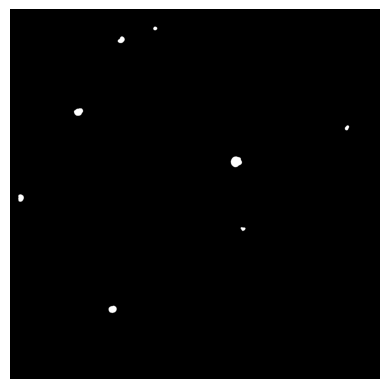

In [7]:
import cv2
import matplotlib.pyplot as plt
import skimage
from skimage import morphology

# Load the TIFF image
image = cv2.imread('/Users/julianortner/Desktop/Master MHS/8. Semester (Master MHS)/PSI FS23/Computational part/Images_TIFF/raw/23-1_DAPI_q6.tif', cv2.IMREAD_GRAYSCALE)

# Apply thresholding
_, thresholded = cv2.threshold(image, 8, 255, cv2.THRESH_BINARY)

print(thresholded)
# Convert the thresholded image to binary
binary_image = thresholded // 255

# Convert the binary image to boolean array
boolean_image = binary_image.astype(bool) # takes a boolean array into account 
# -> basically converted binary to boolean and then convert it back to binary 

# Remove small objects
remove_so = morphology.remove_small_objects(boolean_image, min_size=200)

# Convert the boolean image back to binary
binary_result = remove_so.astype(int) * 255


# Display the result
plt.imshow(binary_result[1000:3000, 1000:3000], cmap='gray')
plt.axis('off')
plt.show()


In [3]:
import numpy as np
from skimage import measure

# Assuming you have a binary image where objects are white (255) and the background is black (0)
binary_image = thresholded
# Label the connected components (objects) in the binary image
labels = measure.label(binary_image)

# Calculate the properties of the labeled objects, including area
properties = measure.regionprops(labels)

# Iterate over the properties and print the area of each object
for prop in properties:
    print('Object area:', prop.area)


NameError: name 'thresholded' is not defined

In [113]:
'''import matplotlib.pyplot as plt

# Assuming you have the original binary image stored in the 'binary_image' variable
# Overlay the labeled regions on the original binary image
overlay = binary_image.copy()
overlay[labels != 0] = 255

# Display the overlay
plt.imshow(overlay, cmap='gray')
plt.axis('off')
plt.show()
'''

"import matplotlib.pyplot as plt\n\n# Assuming you have the original binary image stored in the 'binary_image' variable\n# Overlay the labeled regions on the original binary image\noverlay = binary_image.copy()\noverlay[labels != 0] = 255\n\n# Display the overlay\nplt.imshow(overlay, cmap='gray')\nplt.axis('off')\nplt.show()\n"

## Global tresholding but using the small_objects function 

In this updated code:

The TIFF image is loaded in grayscale format using cv2.imread() with the cv2.IMREAD_GRAYSCALE flag.

Adaptive thresholding is applied using cv2.adaptiveThreshold(). The cv2.ADAPTIVE_THRESH_MEAN_C flag specifies that the threshold value is calculated as the mean of the neighborhood area. The cv2.THRESH_BINARY flag sets the thresholding type to binary.

The 11 value represents the block size, which determines the size of the neighborhood area used for calculating the threshold value. The 2 value is the constant subtracted from the mean, helping fine-tune the thresholding.

The resulting thresholded image is displayed using plt.imshow() with the cmap='gray' argument to visualize it in grayscale. The plt.axis('off') line removes the axes from the plot. Finally, plt.show() displays the plot with the thresholded image.

Adaptive thresholding adjusts the threshold value for each pixel based on its local neighborhood, which can be beneficial for images with varying lighting conditions or local intensity variations. Adjusting the block size and the constant subtracted from the mean may also help optimize the thresholding results.

# Add GaussianBlur to smooth picture and use Adaptive tresholding 

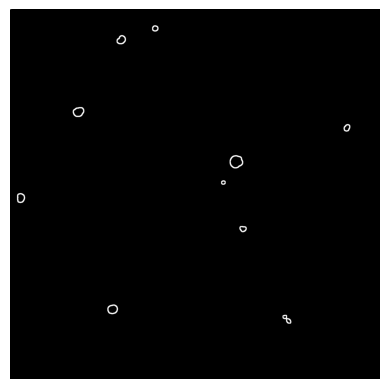

In [145]:
import cv2
import matplotlib.pyplot as plt

# Load the TIFF image
image = cv2.imread('/Users/julianortner/Desktop/Master MHS/8. Semester (Master MHS)/PSI FS23/Computational part/Images_TIFF/raw/23-1_DAPI_q6.tif', cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(image, (7, 7), 0)

# Apply adaptive thresholding
thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Invert the thresholded image
inverted = cv2.bitwise_not(thresholded)

# Extract the region of interest [1000:3000, 1000:3000]
region_of_interest = inverted[1000:3000, 1000:3000]

# Display the region of interest
plt.imshow(region_of_interest, cmap='gray')
plt.axis('off')  # Remove axes
plt.show()


If adaptive thresholding worked for your image, but binary thresholding did not produce satisfactory results, it suggests that a fixed threshold value may not be suitable for distinguishing the cells from the background in your image.

Adaptive thresholding is advantageous when the image has varying lighting conditions or when there are local intensity variations. It calculates a threshold value based on a local neighborhood around each pixel, making it more adaptive to different regions of the image.

Binary thresholding, on the other hand, uses a fixed threshold value to classify pixels as foreground or background. If the image has uneven lighting or if the pixel intensities of the cells and the background overlap, a fixed threshold value might not be effective in separating the cells from the background.

In such cases, adaptive thresholding tends to provide better results as it adapts the threshold locally based on the pixel's neighborhood. This allows for better differentiation between the cells and the background, considering variations in lighting and pixel intensities.

In [136]:
import cv2 as cv 
import numpy as np 

img_otsu = cv.imread('/Users/julianortner/Desktop/Master MHS/8. Semester (Master MHS)/PSI FS23/Computational part/Images_TIFF/raw/23-1_DAPI_q6.tif', cv.IMREAD_GRAYSCALE)
blurred = cv.GaussianBlur(img_otsu, (5,5),0)

# find otsu's threshold value with OpenCV function
ret, otsu = cv.threshold(blurred,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print( "{} {}".format(thresh,ret) )







[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]] 121.0


## Try Otsu tresholding 

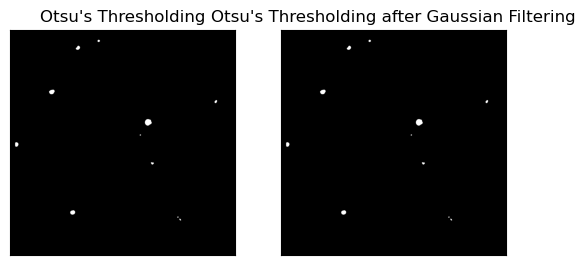

In [147]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/Users/julianortner/Desktop/Master MHS/8. Semester (Master MHS)/PSI FS23/Computational part/Images_TIFF/raw/23-1_DAPI_q6.tif', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Extract the desired region [1000:3000, 1000:3000]
region_of_interest = img[1000:3000, 1000:3000]

# Otsu's thresholding
ret2, th2 = cv.threshold(region_of_interest, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(region_of_interest, (5, 5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Display the images
plt.subplot(1, 2, 1), plt.imshow(th2, 'gray')
plt.title("Otsu's Thresholding"), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(th3, 'gray')
plt.title("Otsu's Thresholding after Gaussian Filtering"), plt.xticks([]), plt.yticks([])

plt.show()


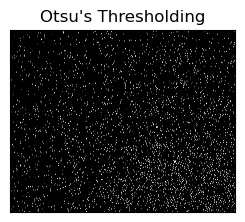

In [143]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/Users/julianortner/Desktop/Master MHS/8. Semester (Master MHS)/PSI FS23/Computational part/Images_TIFF/raw/23-1_DAPI_q6.tif', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Extract the bottom right corner region
height, width = img.shape[:2]
region_of_interest = img[int(height/2):height, int(width/2):width]

# Otsu's thresholding
ret2, th2 = cv.threshold(region_of_interest, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(region_of_interest, (5, 5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Display the images
plt.subplot(1, 2, 1), plt.imshow(th2, 'gray')
plt.title("Otsu's Thresholding"), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(th3, 'gray')
plt.title("Otsu's Thresholding after Gaussian Filtering"), plt.xticks([]), plt.yticks([])

plt.show()


### Tresholding + Use you remove_small_object and remove_small holes 

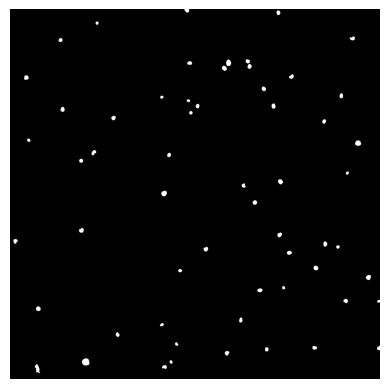

In [150]:
import cv2
import matplotlib.pyplot as plt
import skimage
from skimage import morphology

# Load the TIFF image
image = cv2.imread('/Users/julianortner/Desktop/Master MHS/8. Semester (Master MHS)/PSI FS23/Computational part/Images_TIFF/raw/23-1_DAPI_q6.tif', cv2.IMREAD_GRAYSCALE)

# Apply thresholding
_, thresholded = cv2.threshold(image, 8, 255, cv2.THRESH_BINARY)

# Convert the thresholded image to binary
binary_image = thresholded // 255

# Convert the binary image to boolean array
boolean_image = binary_image.astype(bool)

# Remove small objects
remove_so = morphology.remove_small_objects(boolean_image, min_size=500)

# Convert the boolean image back to binary
binary_result = remove_so.astype(int) * 255

# Define the frame coordinates for the region of interest
x_start = 0
x_end = 3000
y_start = image.shape[0] - 3000
y_end = image.shape[0]

# Display the result
plt.imshow(binary_result[y_start:y_end, x_start:x_end], cmap='gray')
plt.axis('off')
plt.show()




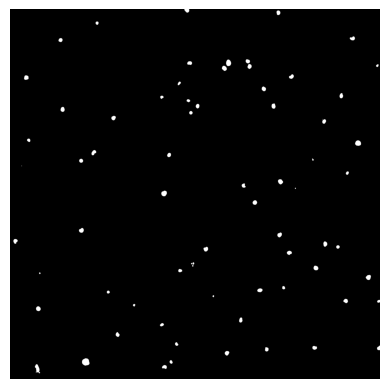

In [162]:
import cv2
import matplotlib.pyplot as plt
import skimage 


org_image = cv2.imread('/Users/julianortner/Desktop/Master MHS/8. Semester (Master MHS)/PSI FS23/Computational part/Images_TIFF/raw/23-1_DAPI_q6.tif')


# Convert the binary image to boolean array
boolean_image = org_image.astype(bool)

# Remove small objects
remove_so = morphology.remove_small_objects(boolean_image, min_size=500)

# Remove small holes
remove_sh = morphology.remove_small_holes(remove_so, area_threshold=500)

# Define the frame coordinates for the region of interest
x_start = 0
x_end = 3000
y_start = org_image.shape[0] - 3000
y_end = org_image.shape[0]

# Display the  image
plt.imshow(org_image[y_start:y_end, x_start:x_end])
plt.axis('off')  # Remove axes
plt.show()


# A segmentation pipeline for cells typically involves a series of steps to identify and delineate individual cells within an image. While there are various approaches and algorithms available, I can provide you with a general outline of a typical segmentation pipeline for cells. Keep in mind that the specific implementation details may vary depending on the dataset and the specific requirements of your application. Here's an overview of the steps involved:




## Preprocessing:

### Image enhancement: 
Enhance the image quality, correct for artifacts, and improve contrast if needed.

### Noise reduction: 
Apply noise reduction techniques such as Gaussian filtering or median filtering to remove noise and smooth the image.

- Use Gaussian Blur 

### Background subtraction: 
If there is a significant background signal, subtract it from the image to isolate the cells

- Not needed since the background is black and the foreground are the cells which are fluorescently labelled 


## Thresholding:

### Global thresholding: 
Apply a global threshold to convert the image into a binary image, where the foreground (cells) is separated from the background. The threshold can be determined based on the histogram analysis or by using a predefined value.

- Using the Otsu method which is a global tresholding method. T gets calculated so you do not set an arbitrary treshold 

### Adaptive thresholding: 
If the image has varying lighting conditions, you can use adaptive thresholding methods that adapt the threshold locally to different image regions.


## Morphological operations:

### Remove small objects: 
Use morphological operations such as erosion and dilation to remove small noise objects or artifacts that might be present in the binary image.

- remove_small_objects function 
- remove small holes function 

### Fill holes: 
Fill any holes present within the segmented cells using morphological operations like dilation followed by erosion.


## Cell separation:

### Connected component analysis: 
Identify individual cells by analyzing connected regions in the binary image. Assign a unique label to each connected component.

### Contour detection: 
Detect cell boundaries or contours by applying edge detection algorithms or contour finding methods to the binary image. 


## Post-processing:

### Feature extraction: 
Extract relevant features from the segmented cells, such as area, perimeter, shape, intensity, etc., which can be used for further analysis or classification.

### Cell tracking:
If you have a time-lapse image sequence, you might need to track cells across multiple frames to analyze their behavior over time.

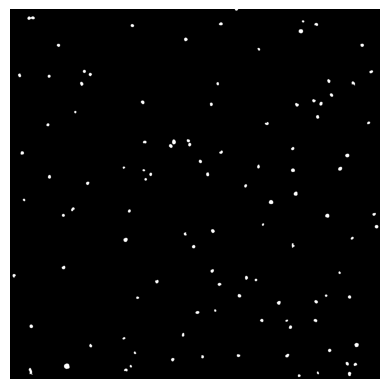

In [158]:
import cv2
import matplotlib.pyplot as plt
import skimage
from skimage import morphology

# Load the TIFF image
image = cv2.imread('/Users/julianortner/Desktop/Master MHS/8. Semester (Master MHS)/PSI FS23/Computational part/Images_TIFF/raw/23-1_DAPI_q6.tif', cv2.IMREAD_GRAYSCALE)

# Apply thresholding
_, thresholded = cv2.threshold(image, 8, 255, cv2.THRESH_BINARY)

# Convert the thresholded image to binary
binary_image = thresholded // 255

# Convert the binary image to boolean array
boolean_image = binary_image.astype(bool)

# Remove small objects
remove_so = morphology.remove_small_objects(boolean_image, min_size=500)

# Remove small holes
remove_sh = morphology.remove_small_holes(remove_so, area_threshold=500)

# Convert the boolean image back to binary
binary_result = remove_sh.astype(int) * 255

# Define the frame coordinates for the region of interest
x_start = 0
x_end = 4000
y_start = image.shape[0] - 4000
y_end = image.shape[0]

# Display the result
plt.imshow(binary_result[y_start:y_end, x_start:x_end], cmap='gray')
plt.axis('off')
plt.show()


<IPython.core.display.Javascript object>


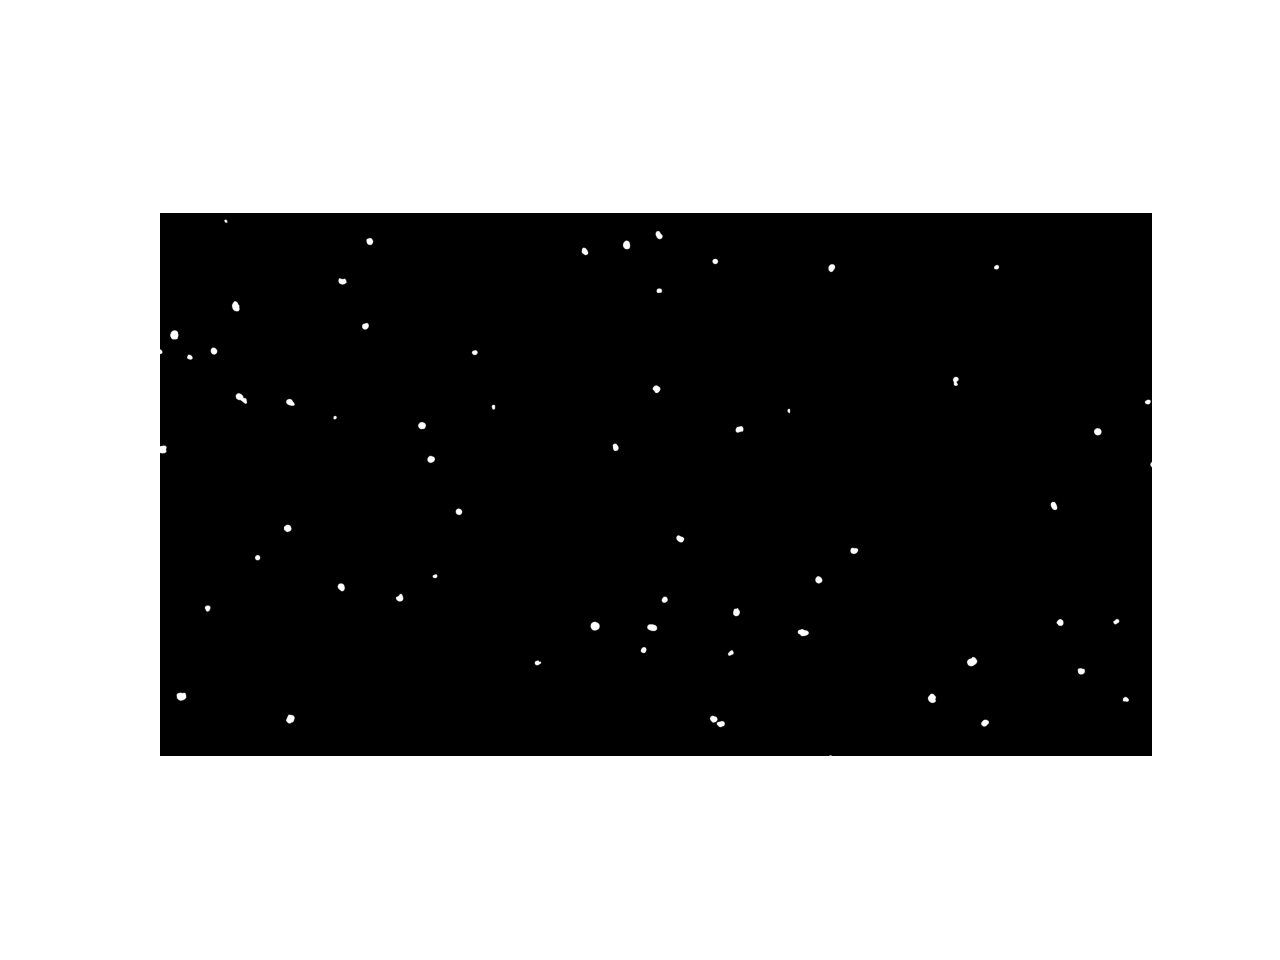

In [167]:
'''import cv2
import matplotlib.pyplot as plt

# Load the image
org_image = cv2.imread('/Users/julianortner/Desktop/Master MHS/8. Semester (Master MHS)/PSI FS23/Computational part/Images_TIFF/raw/23-1_DAPI_q6.tif')

# Define the frame coordinates for the region of interest


# Enable interactive mode with notebook backend
%matplotlib notebook

# Display the region of interest (bottom left corner)
plt.imshow(org_image)
plt.axis('off')

# Show the plot
plt.show()

'''


#### Watershedding 

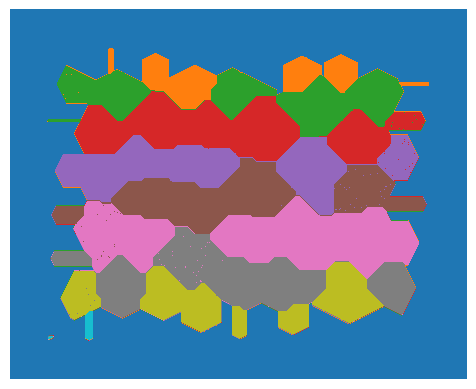

In [41]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# Load the TIFF image
image = cv2.imread('/Users/julianortner/Desktop/Master MHS/8. Semester (Master MHS)/PSI FS23/Computational part/Images_TIFF/raw/23-1_DAPI_q10.tif', cv2.IMREAD_GRAYSCALE)
#  image = image[15000:16000, 15000:16000]
blurred = cv2.GaussianBlur(image, (7, 7), 0)

# Apply Otsu thresholding
_, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Invert the thresholded image
inverted = cv2.bitwise_not(thresholded)

# Invert the foreground and background values
foreground = cv2.bitwise_not(inverted)

# Extract the region of interest [1000:3000, 1000:3000]
# region_of_interest = foreground[1000:3000, 1000:3000]

# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, min_distance = 1600 , footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

# Display the region of interest
plt.imshow(labels, cmap='tab10')
plt.axis('off')  # Remove axes
plt.show()


In [31]:
print(np.unique(labels))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112]


In [ ]:
from skimage.measure import regionprops
props = regionprops(labels, image)
print(props)

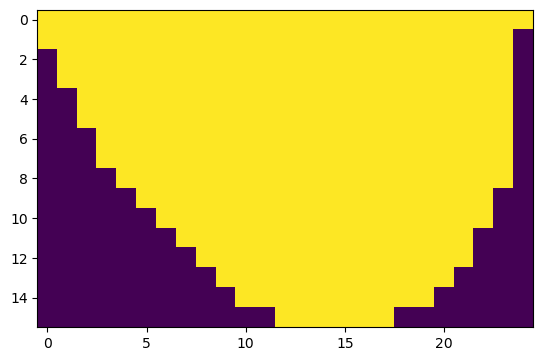

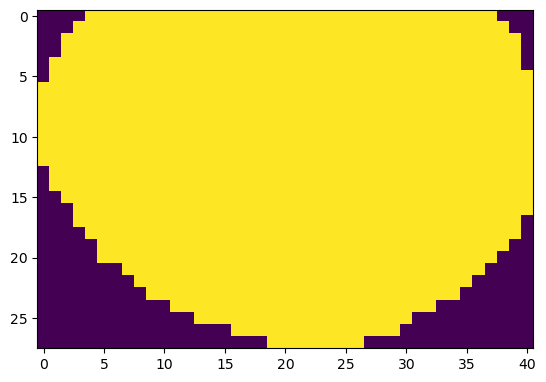

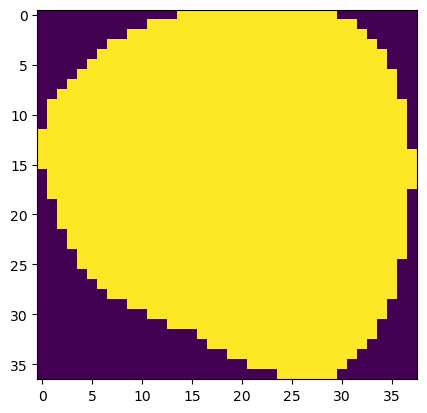

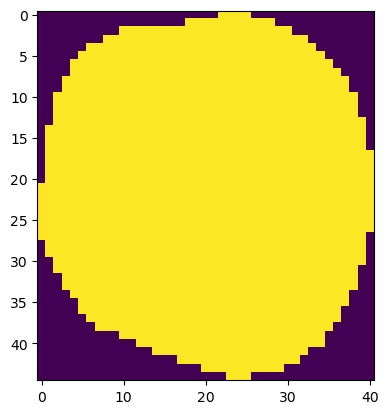

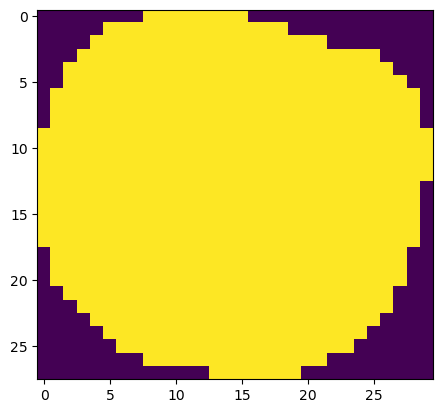

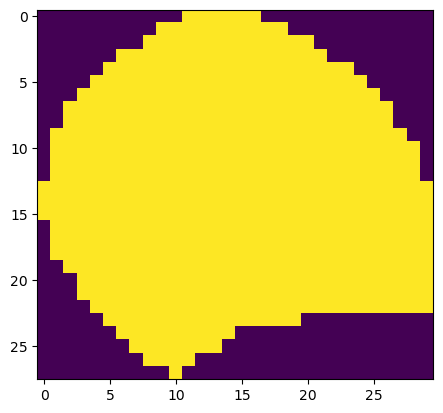

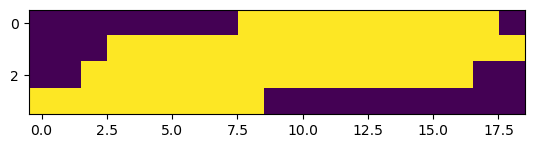

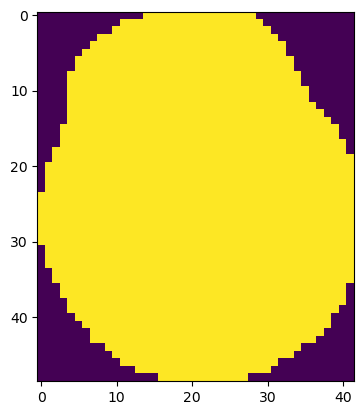

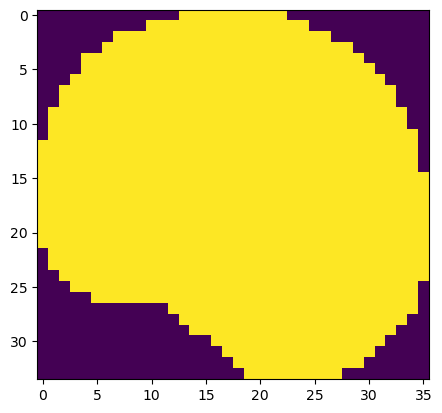

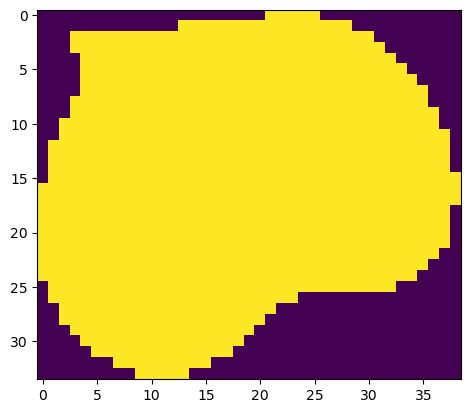

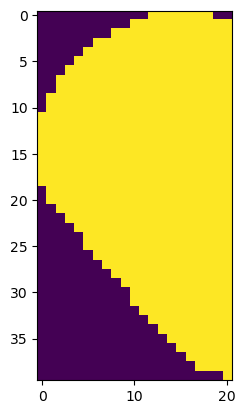

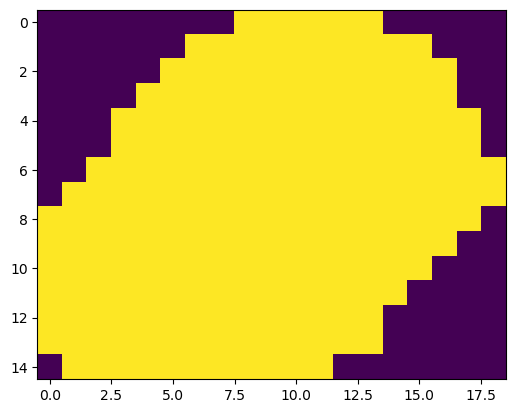

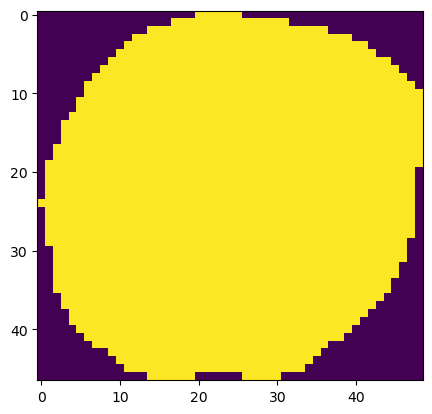

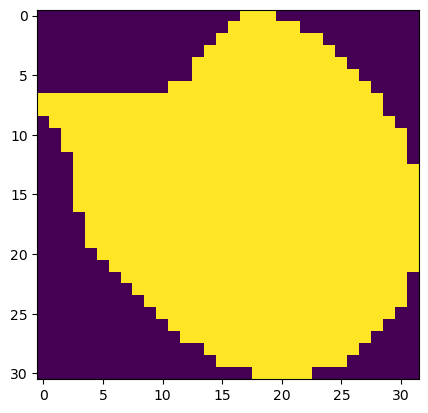

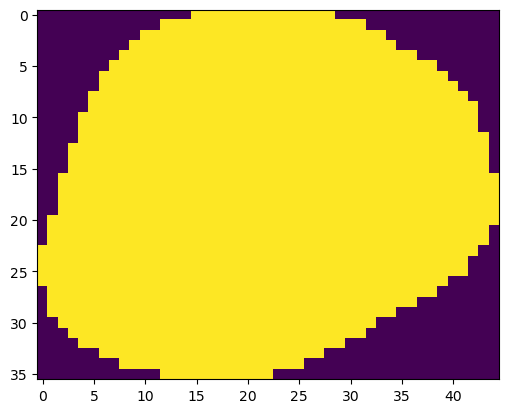

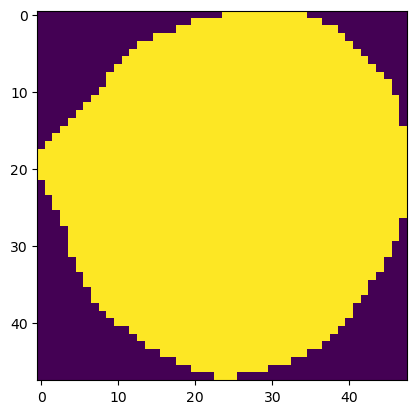

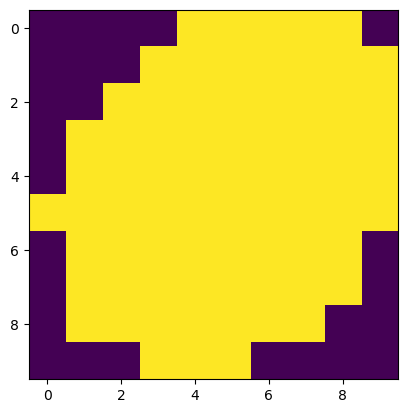

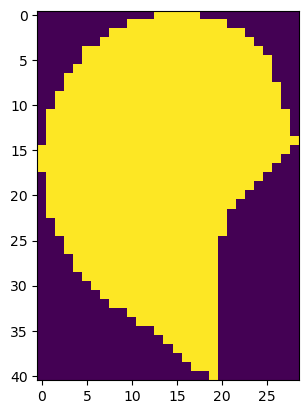

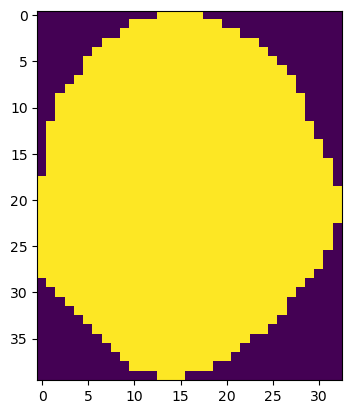

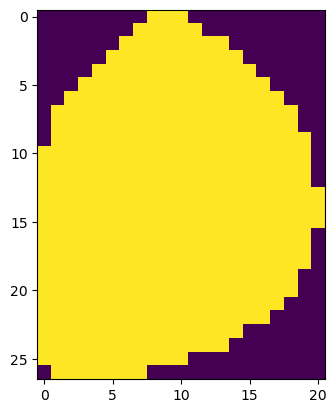

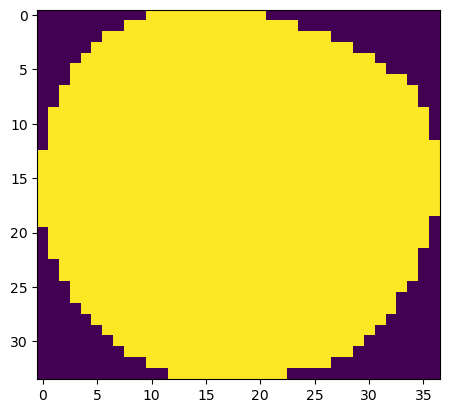

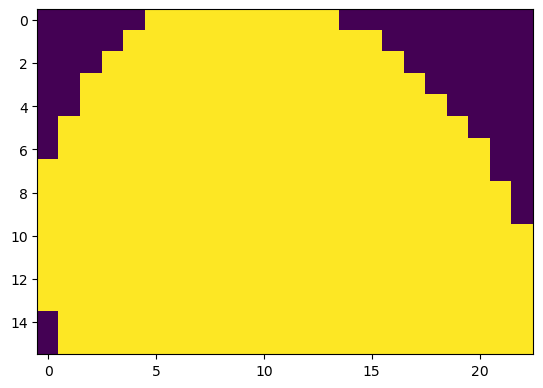

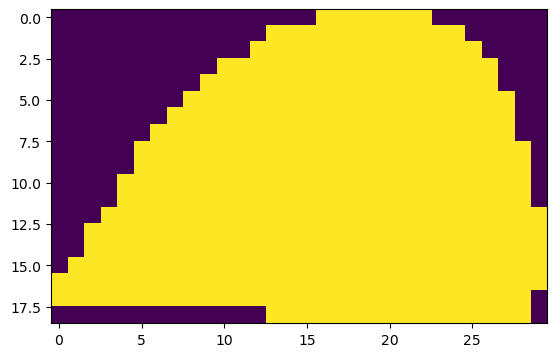

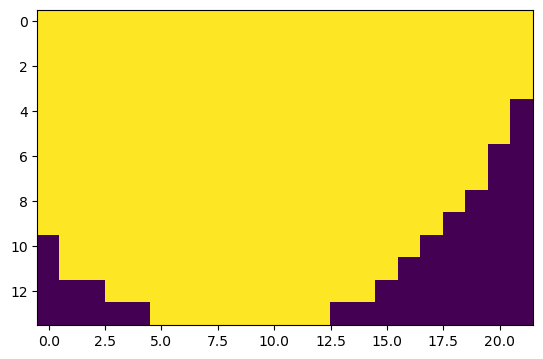

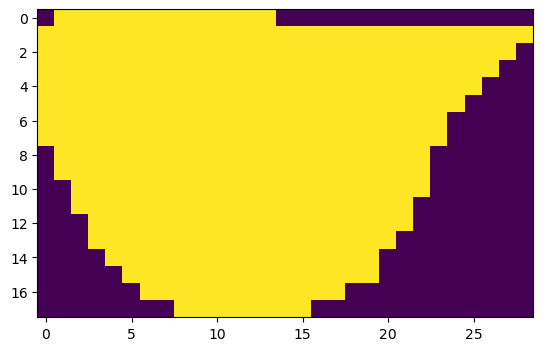

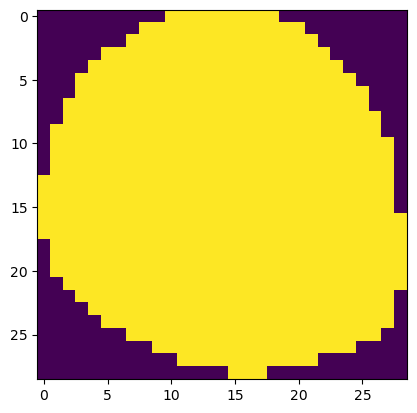

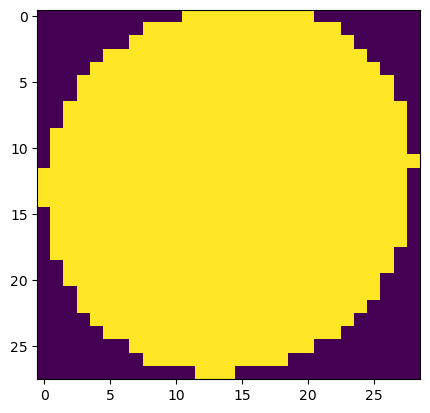

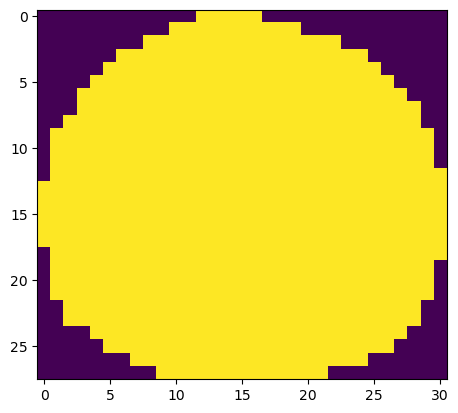

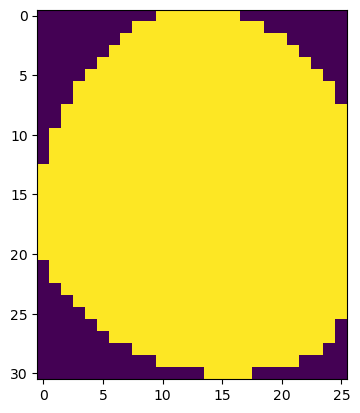

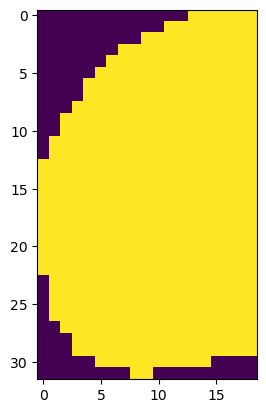

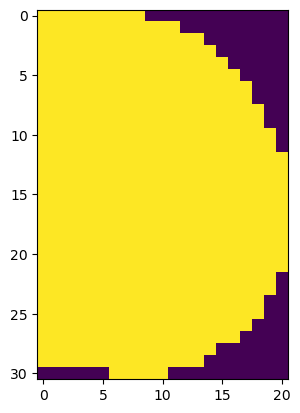

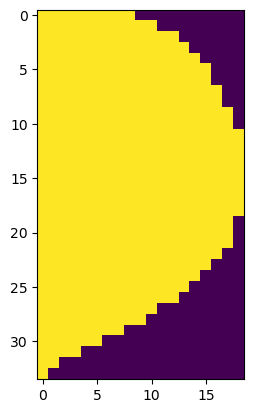

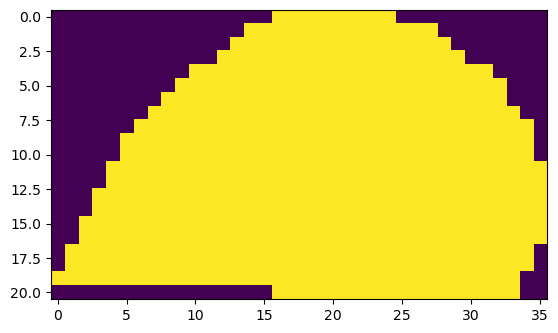

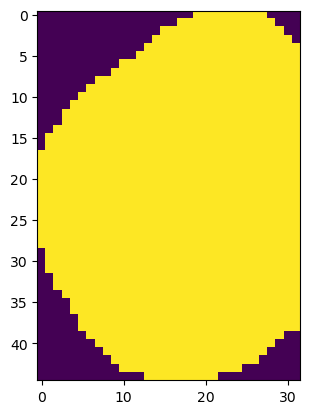

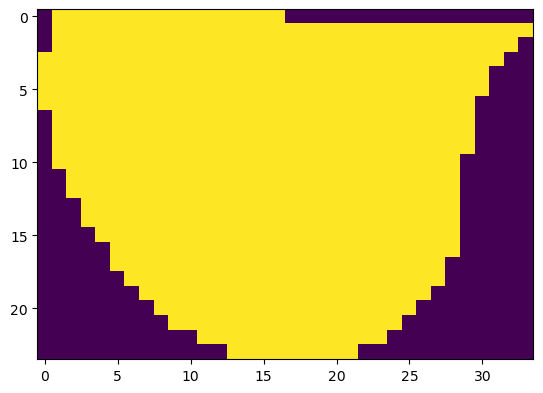

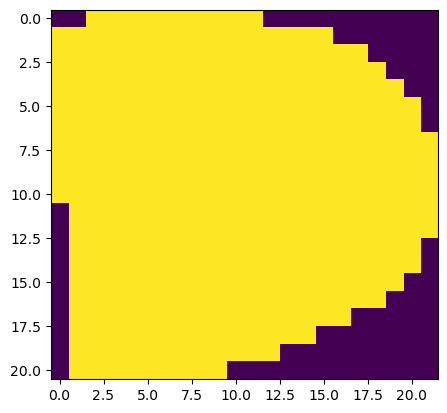

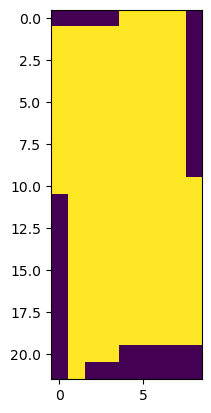

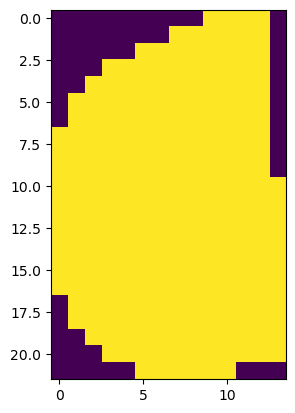

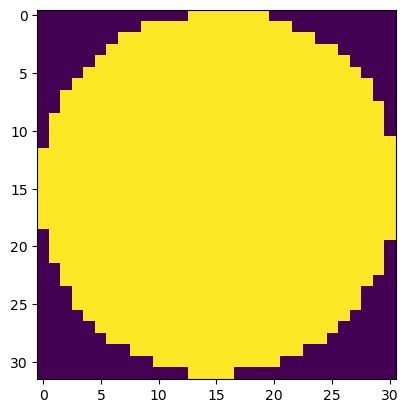

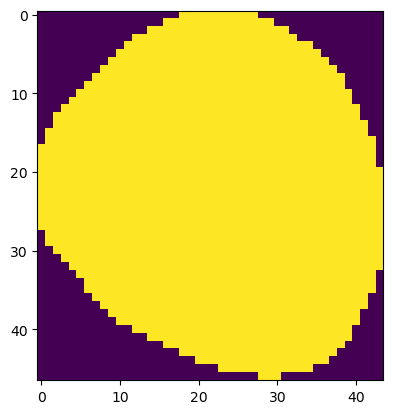

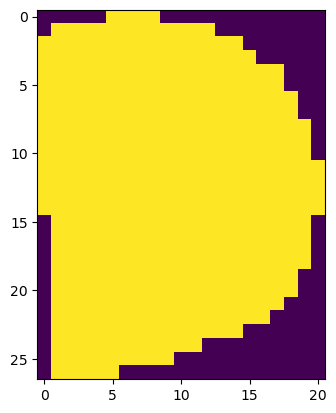

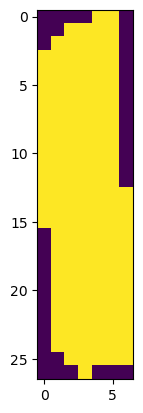

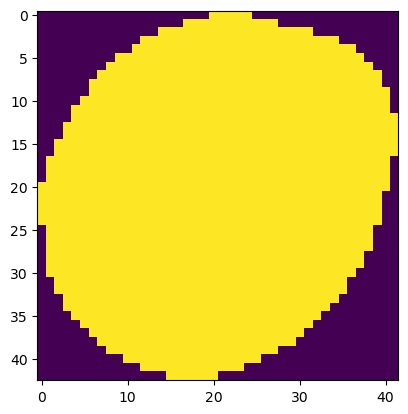

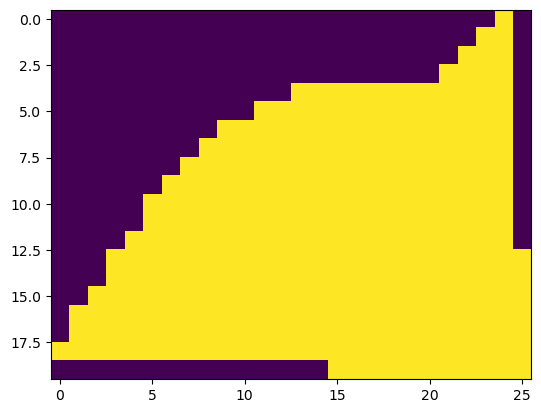

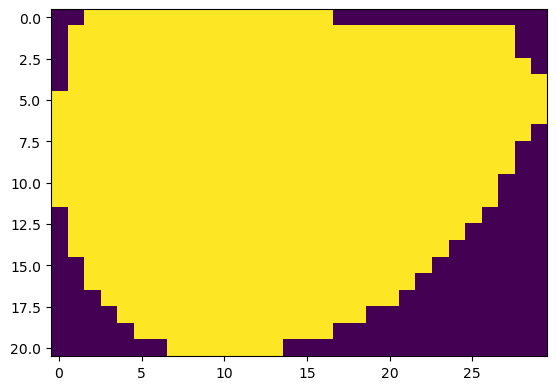

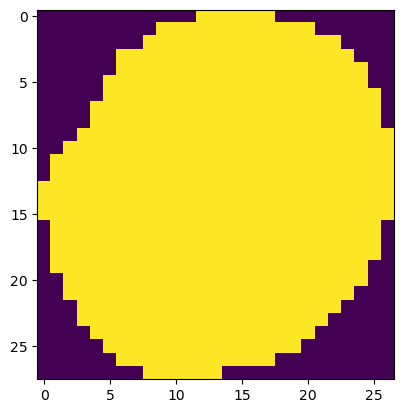

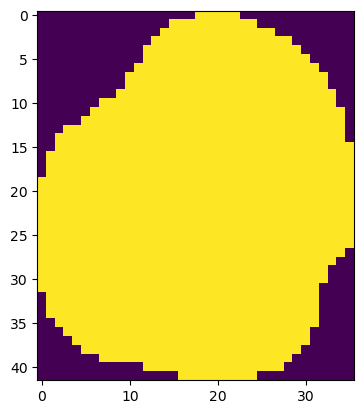

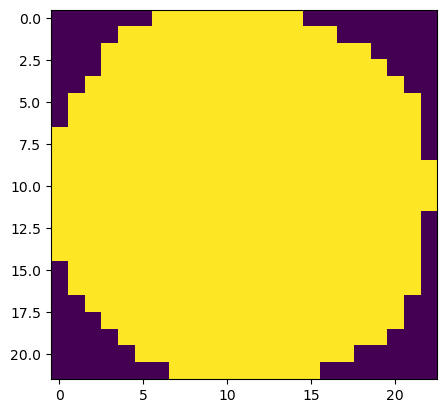

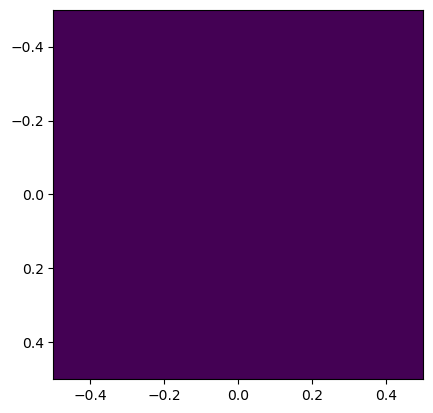

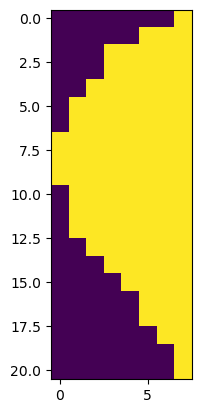

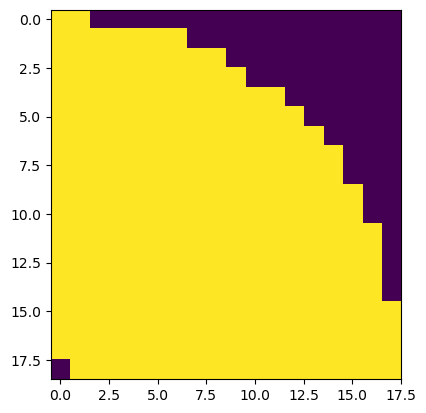

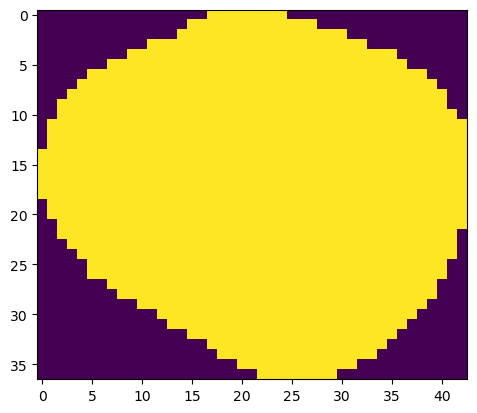

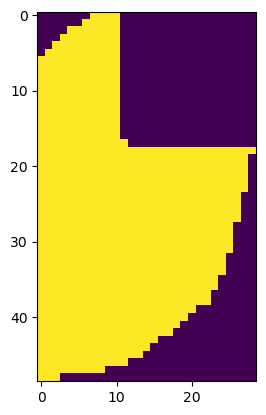

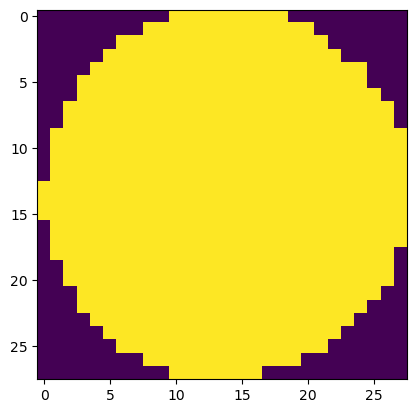

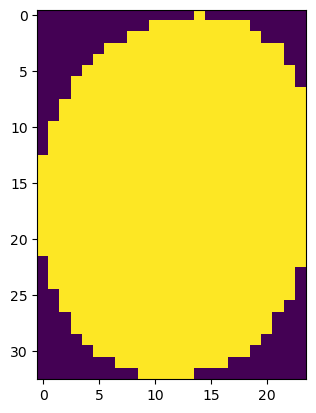

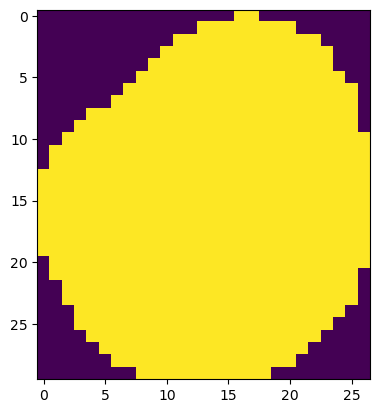

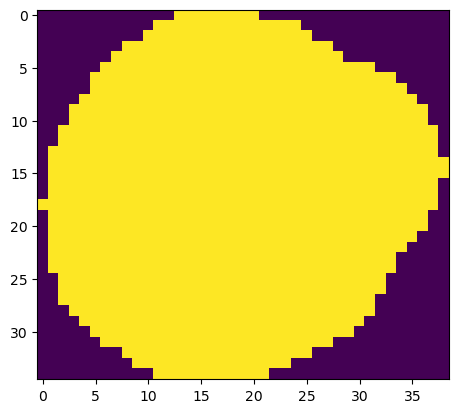

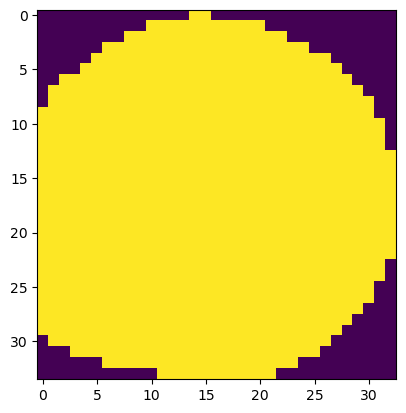

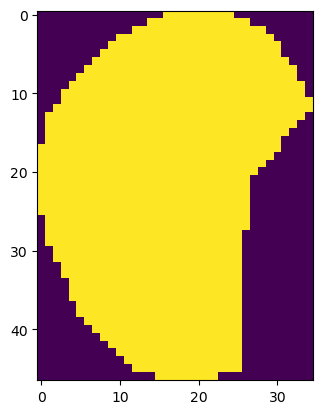

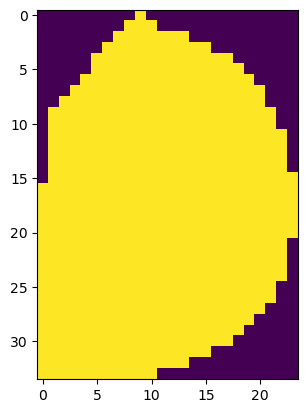

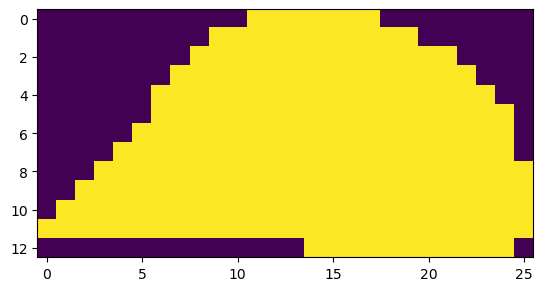

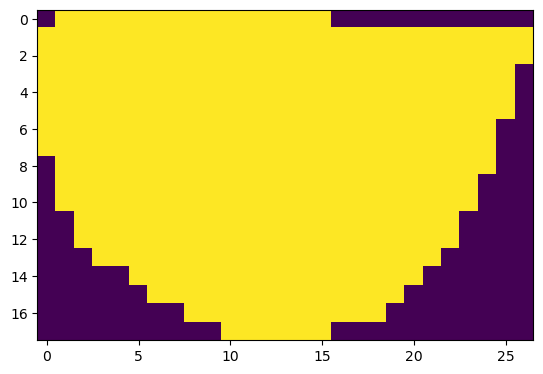

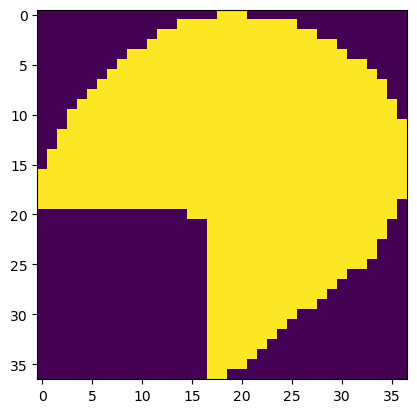

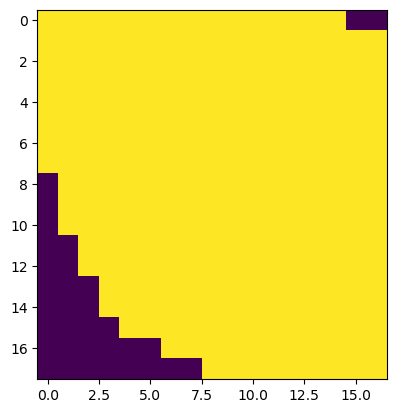

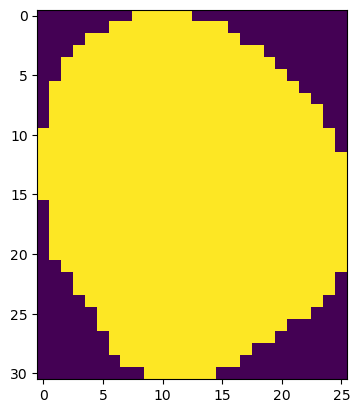

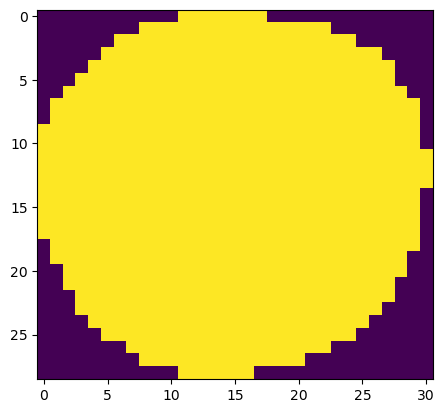

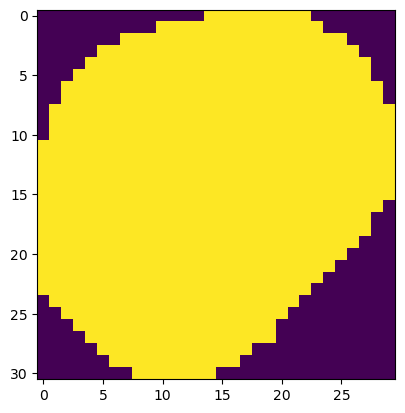

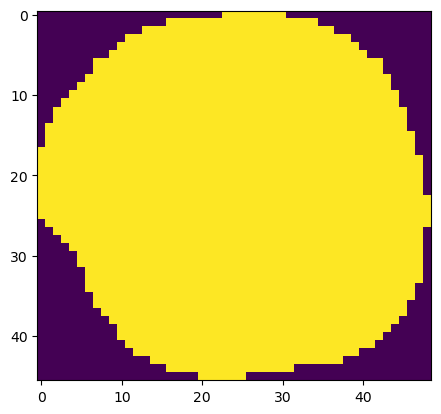

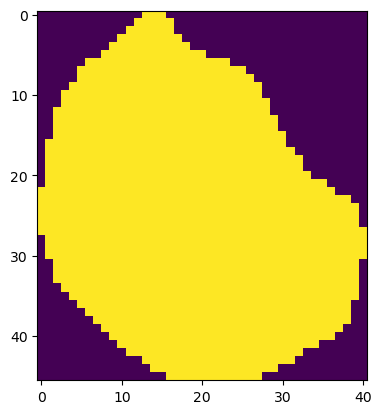

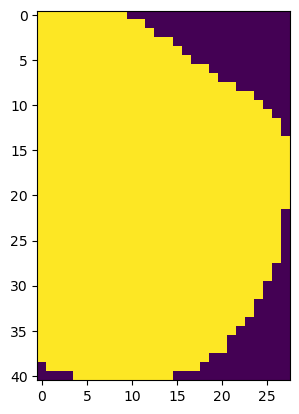

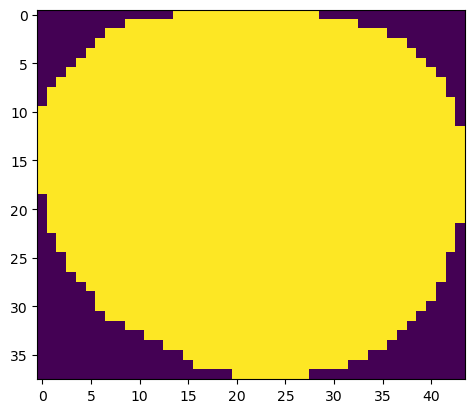

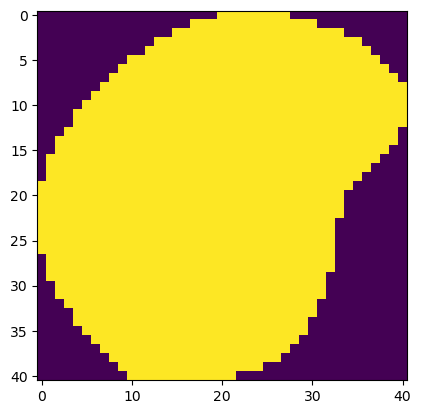

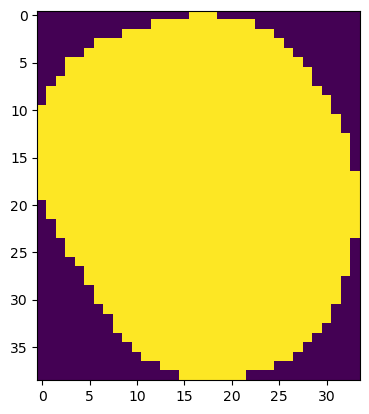

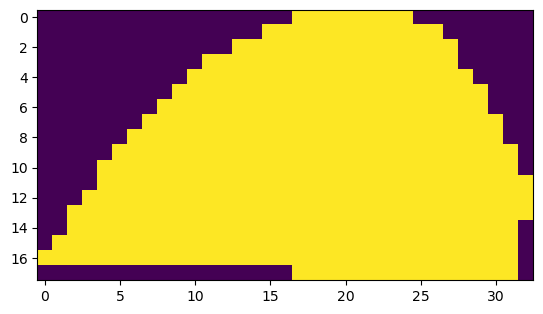

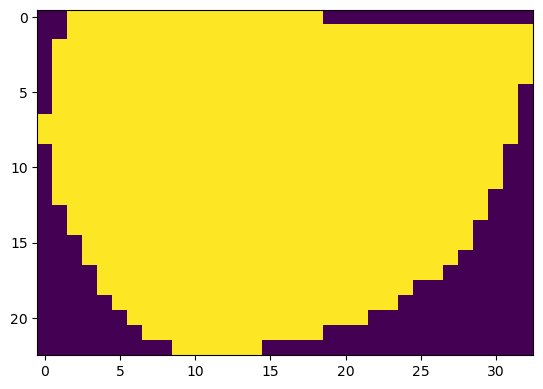

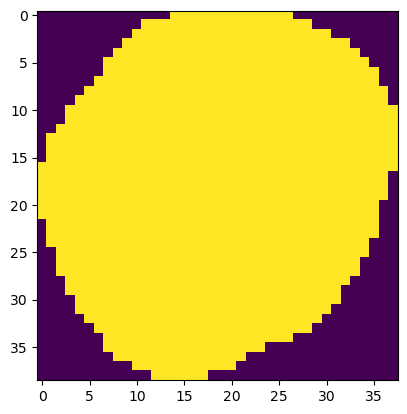

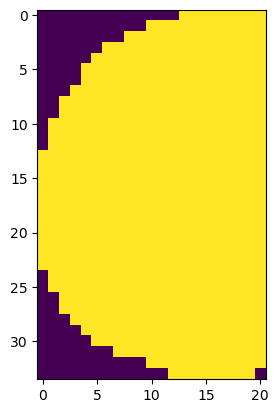

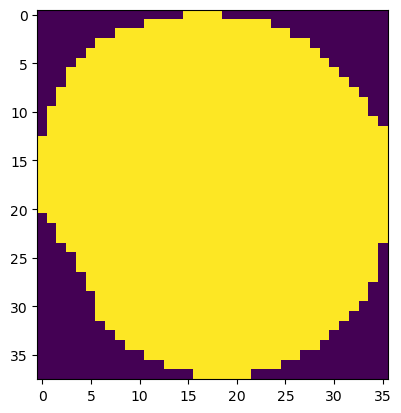

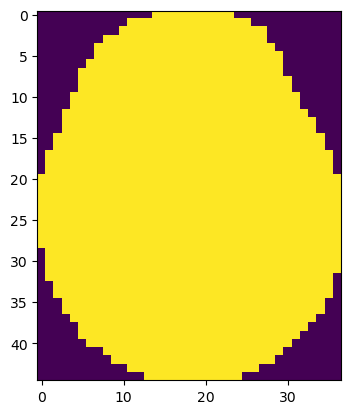

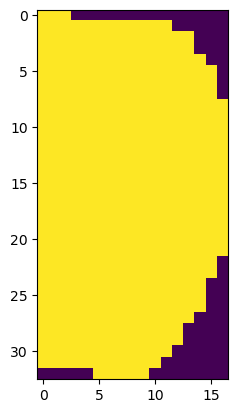

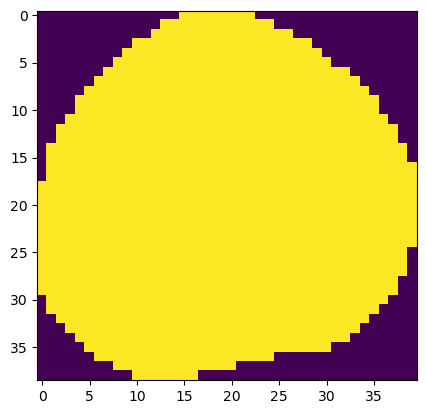

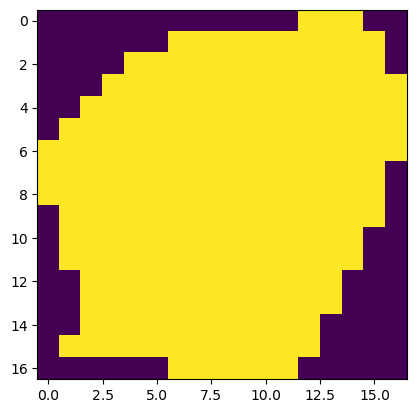

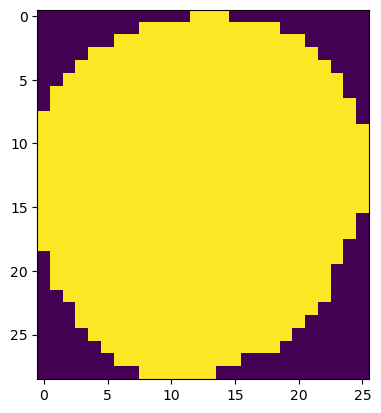

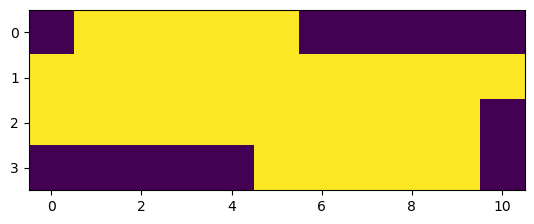

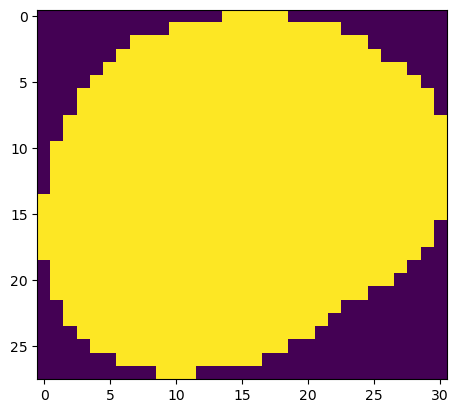

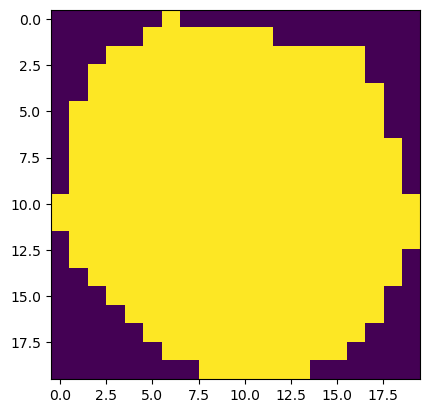

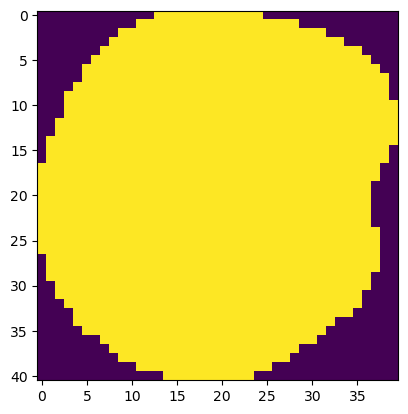

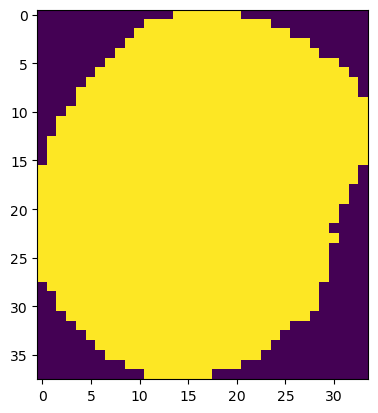

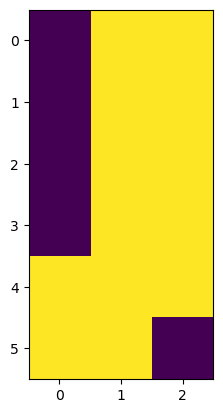

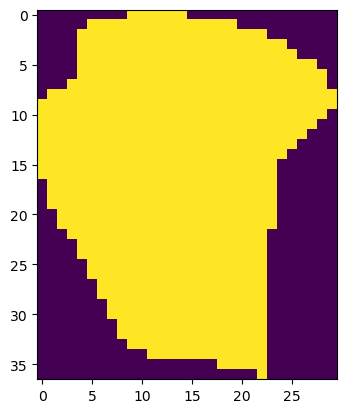

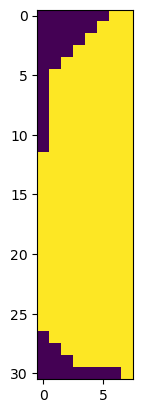

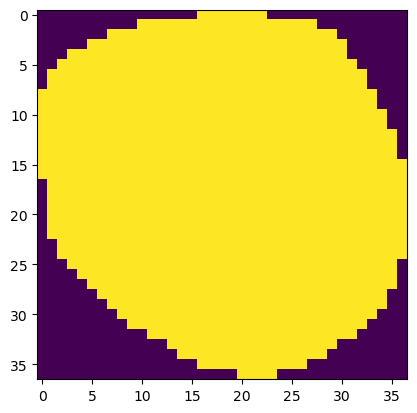

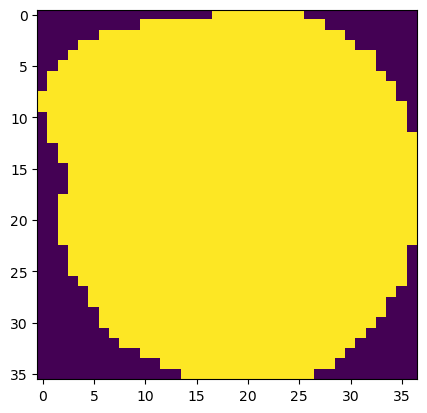

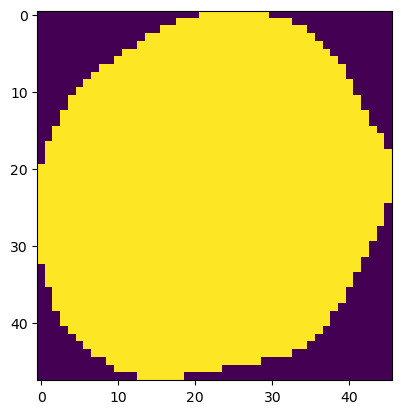

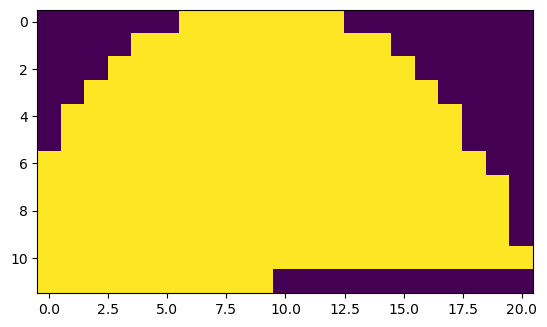

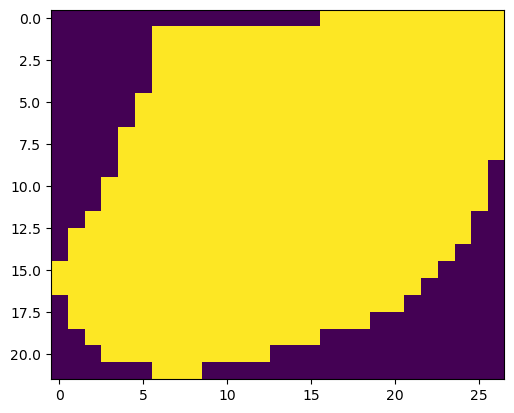

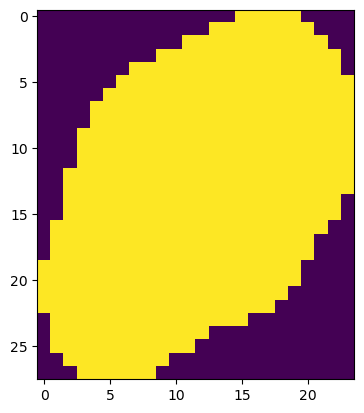

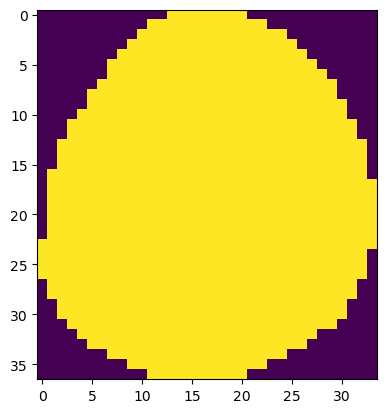

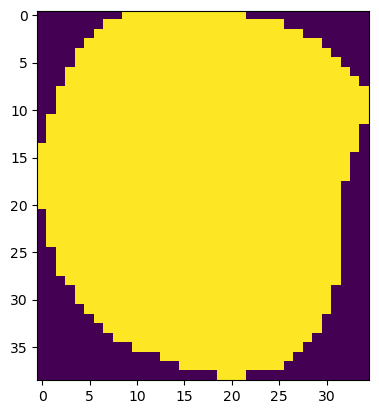

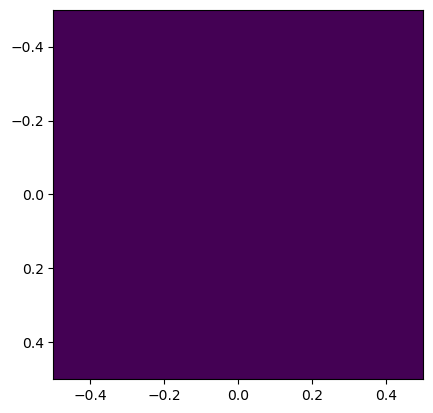

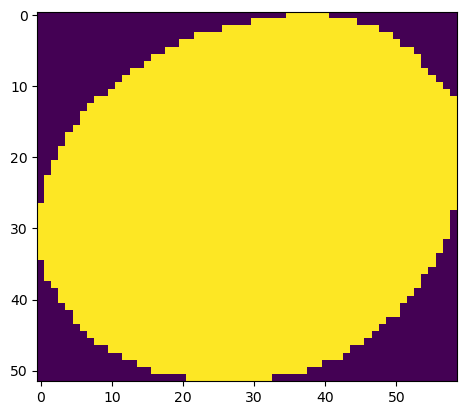

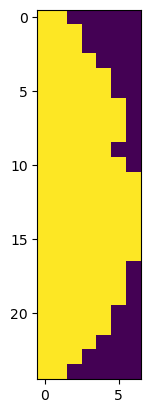

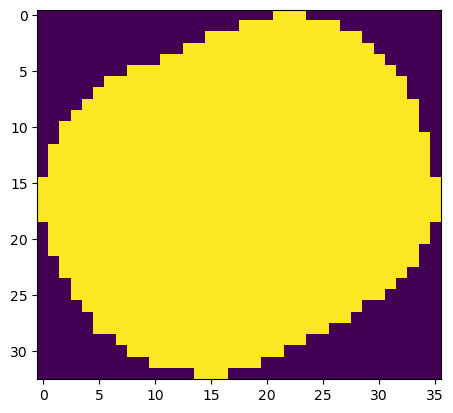

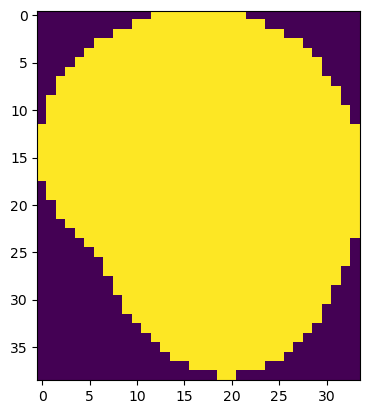

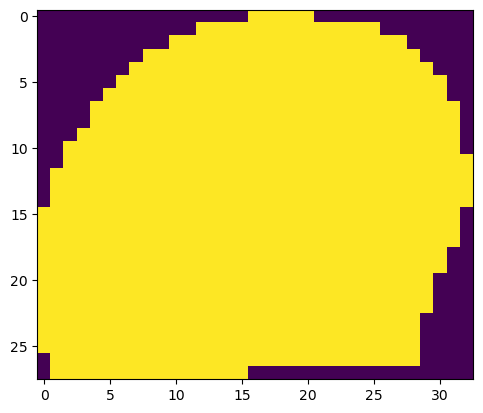

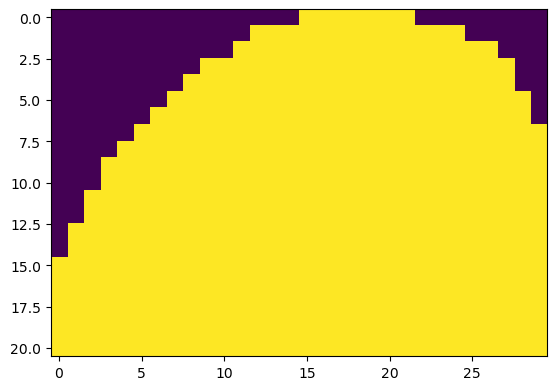

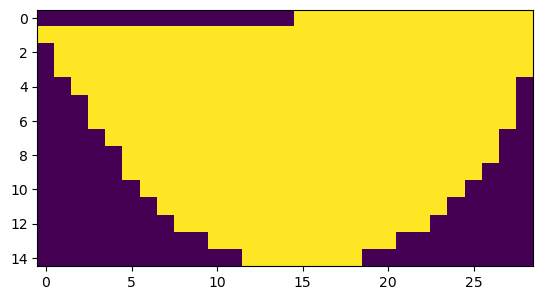

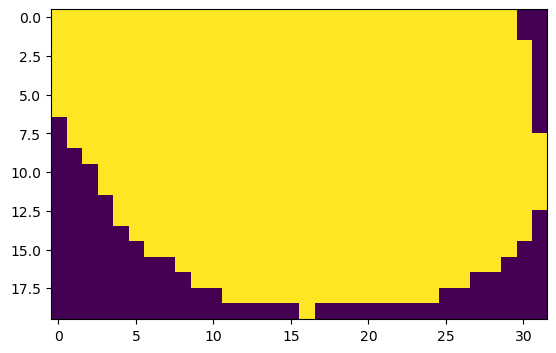

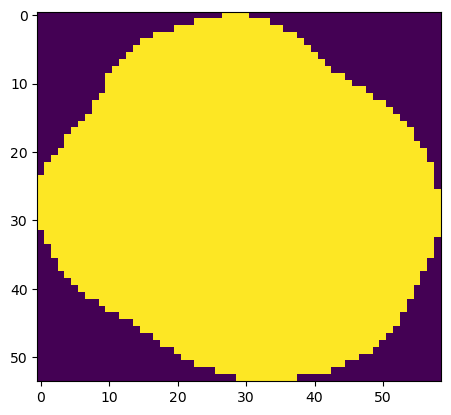

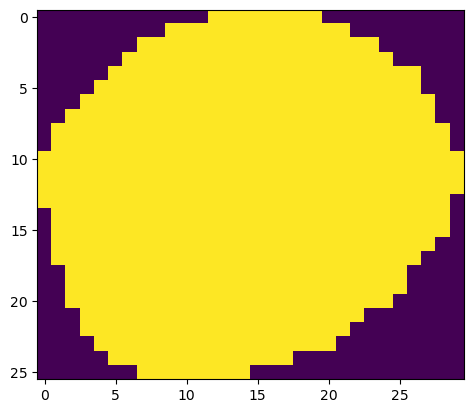

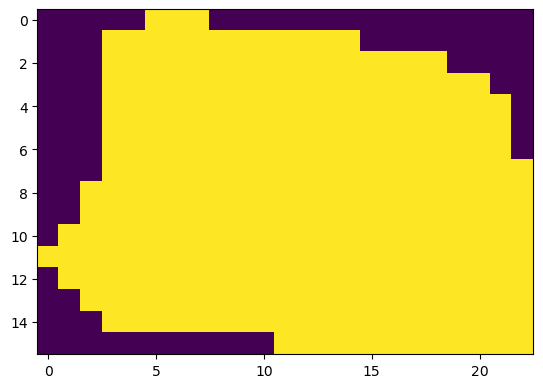

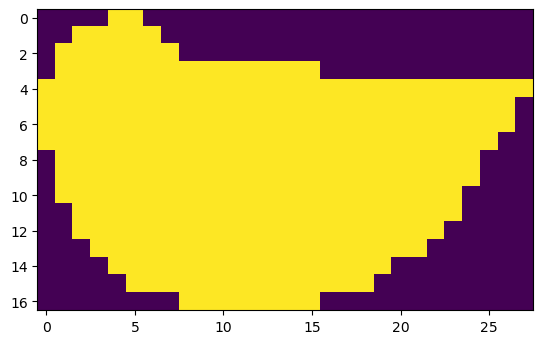

In [35]:
for prop in props:
    plt.imshow(prop.intensity_image)
    plt.show()

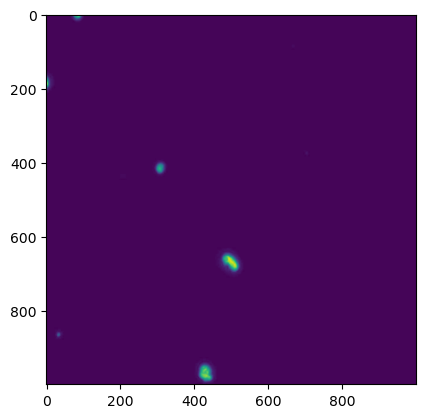

In [37]:
plt.imshow(image)

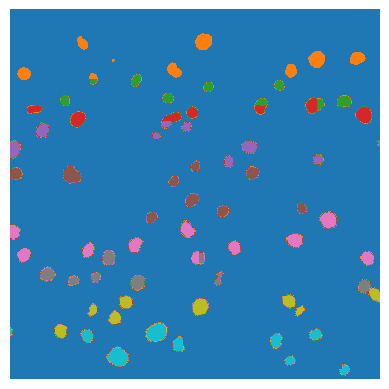

In [30]:
# Display the region of interest
plt.imshow(labels, cmap='tab10')
plt.axis('off')  # Remove axes
plt.show()
